## Assignment2 Vehicle Detection

### Warning this detection is coding in win10 platform
### If you want to check the answer plz, change the absolute dir to relative dir
### Sorry for bringing you troubles.

In [ ]:
# This assignment has the following step
# 1st step: data processing(in the img_processing part)
# 2nd step: feature extraction
# 3rd step: training process
# 4th step: evaluation process

In [ ]:
# Here are some sample which implement the Vehicle detection based on HOG + Color histogram + SVM
# Source: https://github.com/ckirksey3/vehicle-detection-with-svm
# Another Chinese Version of Vehicle Detection
# Source: https://zhuanlan.zhihu.com/p/60229208

### Feature Extraction

In [4]:
import numpy as np 
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

E:\Anaconda3\envs\cv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
# This Assignment used the Hog + color histogram
# This is Due to that the output vector can easily connect with each other
# You can also choose the SIFT, but SIFT needs to create the Bag of Words
# This will increate the work, also hard for freshman to implement

In [ ]:
# The Hog feature also used in object detection
# Source: https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/
# Example Of using Hog
# Source: https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

In [5]:
# If want to check the answer plz change the dir in other system platform

# Setting the directory with the absolute directory in WIN10
vehicle_data_dir = 'C:\\Users\\75611\\Desktop\\Data\\vehicle_data\\'
nonvehicle_data_dir = 'C:\\Users\\75611\\Desktop\\Data\\nonvehicle_data\\'
# select an image as the test sample to check the hog and color
test_sample = 'C:\\Users\\75611\\Desktop\\Data\\vehicle_data\\IMG_25.png'

In [33]:
# Here need to use Hog-----> Parameters
# Source: https://www.kite.com/python/docs/skimage.feature.hog#
# The return has 2 return which are newarr and hog_image
# You can also find this code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm

# the current version of skimage should change visualise to visualize!!!!
def get_hog_features(img, orient, pix_per_cell, cell_per_block, visual=False, feature_vec=True):
    # visualise == False ----> hog img connot see ----> 1 output
    if visual == False:
        hog_features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, visualize=visual, feature_vector=feature_vec)
        # get the return features
        return hog_features
    elif visual == True:
        # visualise == True ----> hog img can be seen ----> 2 outputs
        hog_features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),cells_per_block=(cell_per_block, cell_per_block),transform_sqrt=True, visualize=visual, feature_vector=feature_vec)
        # get the return features and image
        return hog_features,hog_image
        

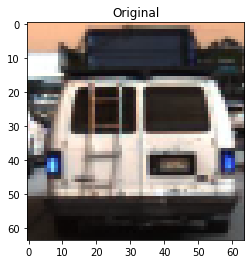

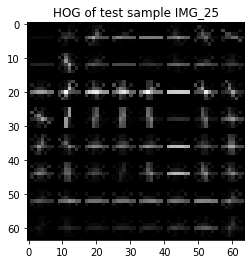

In [47]:
# This test is to check the hog function is right or not
# Check the HOG method
feature_test_image = cv2.imread(test_sample)
# This is because plt should based on RGB ----> convert the color
test_hog_image = cv2.cvtColor(feature_image, cv2.COLOR_BGR2RGB)
hog_features, hog_image = get_hog_features(test_hog_image[:,:,0], orient=9, 
                      pix_per_cell=8, cell_per_block=2, visual=True, feature_vec=True)

# check the original 
plt.title('Original')
plt.imshow(feature_test_image)
plt.show()

# check the hog_image 
plt.imshow(hog_image,'gray')
plt.title('HOG of test sample IMG_25')
plt.show()

In [52]:
# The bin spatial is to get the binned color features
# Set the size as 32 * 32
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm
size_tuple = (32,32)
def bin_spatial(image,img_size=size_tuple):
    features = cv2.resize(image,img_size)
    # Change the array to 1-D array
    # Source: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
    flatten_feature = features.ravel()
    return flatten_feature

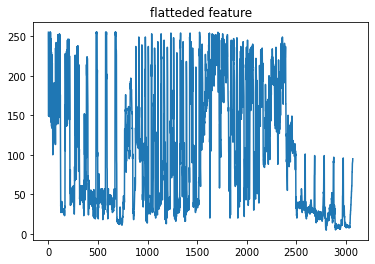

In [54]:
# Based on the previous test image we can get the following result
# This test is to check the bin_spatial function is right or not
flatteded_feature = bin_spatial(test_hog_image)
# print the image graph
plt.plot(flatteded_feature)
plt.title('flatteded feature')
plt.show()

In [79]:
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm
def colour_histogram(image, nbins=32, bins_range=(0,256)):
    channel_tuple = ()
    # np histogram needs 3 parameters
    # Source: https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
    first_channel = image[:,:,0]
    second_channel = image[:,:,1]
    third_channel = image[:,:,2]
    # generating the first channel histogram
    channel1_histogram = np.histogram(first_channel, bins=nbins, range=bins_range)
    channel_tuple = channel_tuple + channel1_histogram
    # generating the second channel histogram
    channel2_histogram = np.histogram(second_channel, bins=nbins, range=bins_range)
    channel_tuple = channel_tuple + channel2_histogram
    # generating the third channel histogram
    channel3_histogram = np.histogram(third_channel, bins=nbins, range=bins_range)
    channel_tuple = channel_tuple + channel3_histogram
    # connect 3 channel together different from stack
    # can setting the the axis to decide the direction of connection
    # Source: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
    hist_features = np.concatenate(channel_tuple,axis=0)
    return hist_features

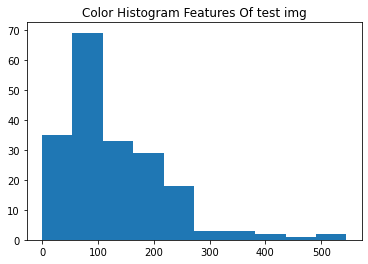

In [80]:
# Based on the previous test image we can get the following result
# This test is to check the color_histogram function is right or not
test_hist_features = colour_histogram(test_hog_image)
plt.hist(test_hist_features)
plt.title('Color Histogram Features Of test img')
plt.show()

In [86]:
# Define a function to extract features from a single image window
# This image window just silding image to get the features
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm
spatial_size=(32, 32)
ori = 9
hist_bin = 32
pix_pr_cell = 8
cell_pr_block=2
h_channel=0

# color space dictionary
color_space = {'HSV':cv2.COLOR_RGB2HSV,'HLS':cv2.COLOR_RGB2HLS,'LUV':cv2.COLOR_RGB2LUV,'YCrCb':cv2.COLOR_RGB2YCrCb,'YUV':cv2.COLOR_RGB2YUV}

def single_img_features(image, color_space='RGB', spatial_size=spatial_size,hist_bins=hist_bin, orient=ori,pix_per_cell=pix_pr_cell, cell_per_block=cell_pr_block, hog_channel=h_channel,spatial_feat=True, hist_feat=True,hog_feat=True, hog_features=None):
    feature_list = list()
    # Check the current image sapce and doing the convert operation
    if color_space != 'RGB':
        if color_space == 'HSV':
            converted_image = cv2.cvtColor(image, color_space['HSV'])
        elif color_space == 'HLS':
            converted_image = cv2.cvtColor(image, color_space['HLS'])
        elif color_space == 'LUV':
            converted_image = cv2.cvtColor(image, color_space['LUV'])
        elif color_space == 'YCrCb':
            converted_image = cv2.cvtColor(image, color_space['YCrCb'])
        elif color_space == 'YUV':
            converted_image = cv2.cvtColor(image, color_space['YUV'])
    else: 
        feature_image = np.copy(image)

    # check whther need to compute the bin_spatial
    if spatial_feat == False:
        pass
    else:
        # Using the previous bin_spatial function to get the bin_spatial_features
        bin_spatial_features = bin_spatial(feature_image, size=spatial_size)
        feature_list.append(bin_spatial_features)

    # check whther need to compute the colour_histogram
    if hist_feat == False:
        pass
    else:
        # Using the previous colour_histogram function to get the colour_histogram_features
        colour_histogram_features = colour_histogram(feature_image, nbins=hist_bins)
        feature_list.append(colour_histogram_features)

    # check whther need to compute the hog_features
    # 2 kinds situation all feature or hog feature
    if hog_feat == False:
        pass
    else:
        # Get all channel need go through for loop to get all channels
        if hog_channel == 'ALL':
            hog_features = list()
            # feature_image_range
            feature_image_range = feature_image.shape[2]
            for channel in range(feature_image_range):
                # get the Specific channel of image
                current_channel_img = feature_image[:,:,channel]
                # get the current_channel_img feature by get_hog_features
                # using extend to get all these features
                hog_features.extend(get_hog_features(current_channel_img, 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            # only get the hog channel
            hog_channel_img = feature_image[:,:,hog_channel]
            # get the hog_feature by get_hog_features
            hog_features = get_hog_features(hog_channel_img, orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
         # Append hog_features to list
        feature_list.append(hog_features)
    # Return concatenated array of features / connecting these features
    # This is also the advantage why choosing hog color histogram 
    # Easy to do the vector connection, No Bow implementation
    return np.concatenate(feature_list)

In [85]:
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm
spatial_size=(32, 32)
ori = 9
hist_bin = 32
pix_pr_cell = 8
cell_pr_block=2
h_channel=0

# extract feature based on the single_img_features --based on--> get_hog_features / bin_spatial / colour_histogram
def extract_features(imgs, color_space='RGB', spatial_size=spatial_size,
                        hist_bins=hist_bin, orient=ori, 
                        pix_per_cell=pix_pr_cell, cell_per_block=cell_pr_block, hog_channel=h_channel,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features_collector = list()
    # Iterate through the list of images
    for img in imgs:
        image = cv2.imread(img)
        imag_features = single_img_features(image, color_space, spatial_size,
            hist_bins, orient, pix_per_cell, cell_per_block, hog_channel,
            spatial_feat, hist_feat, hog_feat)
        features_collector.append(imag_features)
    # Return list of feature vectors
    return features_collector

### Training Process

### Drawing the rectangle of vehicles

### Evaluation Part